## Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?


Ridge regression is a term used to refer to a linear regression model whose coefficients are estimated not by ordinary least squares (OLS), but by an estimator, called ridge estimator, that, albeit biased, has lower variance than the OLS estimator.

Ordinary Least Squares (OLS) is a technique used to calculate the parameters of a linear regression model. The objective is to find the best-fit line that minimizes the sum of squared residuals between the observed data points and the anticipated values from the linear model.

Ridge Regression is a technique used in linear regression to address the problem of overfitting. It does this by adding a regularization term to the loss function, which shrinks the coefficients toward zero. This reduces the variance of the model and can improve its predictive performance.

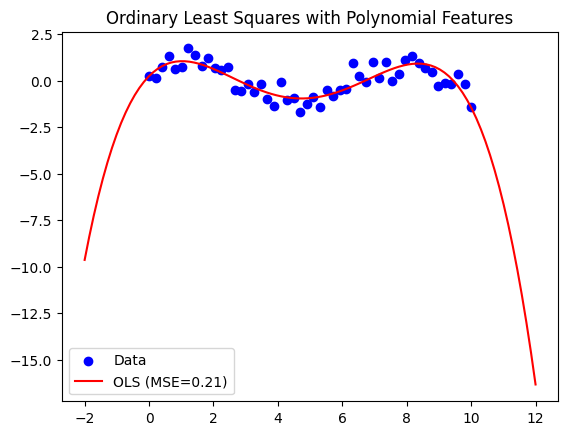

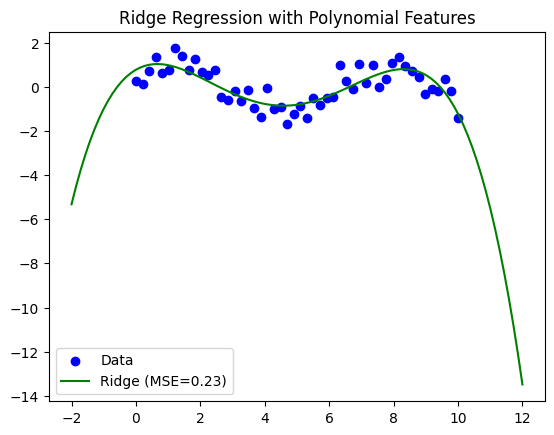

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset with a non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = np.sin(X) + np.random.normal(0, 0.5, 50)

# Fit OLS and Ridge Regression models with polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))
ols = LinearRegression().fit(X_poly, y)
ridge = Ridge(alpha=1).fit(X_poly, y)

# Predict the output for the test data points
X_test = np.linspace(-2, 12, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
ols_pred = ols.predict(X_test_poly)
ridge_pred = ridge.predict(X_test_poly)

# Compute the mean squared error on the test dataset
ols_mse = mean_squared_error(y_true=y, y_pred=ols.predict(X_poly))
ridge_mse = mean_squared_error(y_true=y, y_pred=ridge.predict(X_poly))

# Plot the data and the regression lines for OLS
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ols_pred, color='red', label=f'OLS (MSE={ols_mse:.2f})')
plt.legend()
plt.title('Ordinary Least Squares with Polynomial Features')
plt.show()

# Plot the data and the regression lines for Ridge Regression
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, ridge_pred, color='green', label=f'Ridge (MSE={ridge_mse:.2f})')
plt.legend()
plt.title('Ridge Regression with Polynomial Features')
plt.show()

Ordinary Least Squares and Ridge Regression Variance:

Assume we have a dataset containing a response variable, Y, and a predictor variable, X, with n predictors, such as x1, x2, x3,..etc. To predict Y based on predictor X, we want to construct a linear regression model. In this instance, we’ll compare Ridge Regression to the OLS approach.

Ordinary Least Squares (OLS): OLS aims to minimize the sum of squared residuals and finds the best-fit coefficients for the predictors. The OLS estimator is given by:



Ridge Regression: Ridge Regression adds a penalty term known as the regularization parameter, to the sum of squared residuals to control the magnitude of the coefficients. The Ridge estimator is given by:



Here, λ (lambda) is the regularization parameter, and I is the identity matrix

Now, let’s consider the effect of variance in the predictor variables on the coefficients obtained using OLS and Ridge Regression.

Assume that the variance of x1 is significantly larger than the variance of x2. In other words, x1 has a wider range of values compared to x2.

In OLS, the coefficients are estimated using the inverse of (X^T * X), so if one predictor has a larger variance, it will have a greater influence on the estimated coefficients. Consequently, the coefficient for x1 will have a higher variance compared to the coefficient for x2.

In Ridge Regression, the penalty term λ is multiplied by the identity matrix, which helps in shrinking the coefficients towards zero. As a result, Ridge Regression reduces the impact of predictor variables with high variance. Therefore, even if x1 has a higher variance, the Ridge coefficients for x1 and x2 will have a similar variance.

In summary, when there is a difference in variance between predictor variables, OLS tends to give higher variance for coefficients corresponding to predictors with higher variance, while Ridge Regression reduces the variance differences between coefficients by shrinking them towards zero.

Note: The example provided here assumes a simple scenario to demonstrate the variance difference between OLS and Ridge Regression. In practice, the choice between OLS and Ridge Regression depends on various factors, such as the data characteristics, the presence of multicollinearity, and the desired trade-off between bias and variance.

Example:
The code below generates a synthetic dataset with 10 features and 50 samples. We split the data into training and testing sets and fit OLS and Ridge Regression models to the training data. We then compute the mean squared error of the two models on the test dataset and plot the coefficients of the two models to visualize the difference in variance.

OLS MSE: 0.13
Ridge MSE: 0.09


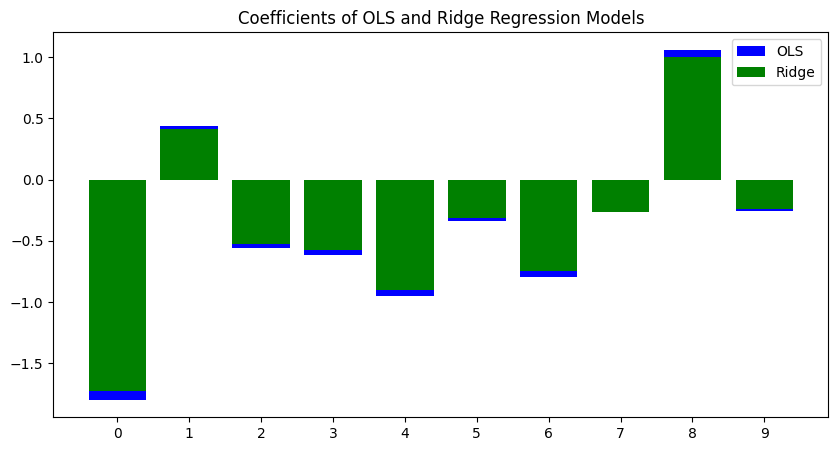

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
np.random.seed(23)
X = np.random.normal(size=(50, 10))
y = X.dot(np.random.normal(size=10)) + np.random.random(size=50)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:40], X[40:], y[:40], y[40:]

# Fit OLS and Ridge Regression models to the training data
ols = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1.2).fit(X_train, y_train)

# Compute the mean squared error on the test dataset
ols_mse = mean_squared_error(y_true=y_test, y_pred=ols.predict(X_test))
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test))

# Print the mean squared error of the two models
print(f"OLS MSE: {ols_mse:.2f}")
print(f"Ridge MSE: {ridge_mse:.2f}")

# Plot the coefficients of the two models
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), ols.coef_, color='blue', label='OLS')
plt.bar(range(X.shape[1]), ridge.coef_, color='green', label='Ridge')
plt.xticks(range(X.shape[1]))
plt.legend()
plt.title('Coefficients of OLS and Ridge Regression Models')
plt.show()


The plot shows that compared to the coefficients of the Ridge Regression model, those of the OLS model are bigger in magnitude and have a wider range. As a result, it can be concluded that the OLS model outperforms the Ridge Regression model in terms of variance and sensitivity to data noise.

OLS Model: The higher MSE of the OLS model (0.13) indicates that it has a relatively higher overall variance compared to the Ridge Regression model.

Ridge Regression Model: The lower MSE of the Ridge Regression model (0.09) suggests that it has a lower overall variance compared to the OLS model.

Source: https://www.geeksforgeeks.org/ordinary-least-squares-and-ridge-regression-variance-in-scikit-learn/

## Q2. What are the assumptions of Ridge Regression?


The assumptions of ridge regression are the same as those of linear regression: linearity, constant variance, and independence. However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.

## Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?


Cross Validation is popular method used to tune the hyperparameter in Ridge Regression.

## Q4. Can Ridge Regression be used for feature selection? If yes, how?


Ridge regression does not perform feature selection, it cannot reduce model complexity by eliminating features. But if one or more features too heavily affect a model’s output, ridge regression can shrink high feature weights (i.e. coefficients) across the model per the L2 penalty term. This reduces the complexity of the model and helps make model predictions less erratically dependent on any one or more feature.

## Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

Multicollinearity happens when predictor variables exhibit a correlation among themselves. Ridge regression aims at reducing the standard error by adding some bias in the estimates of the regression. The reduction of the standard error in regression estimates significantly increases the reliability of the estimates.

## Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Yes, Ridge Regression can handle categorical variables, but they need to be encoded. And, it can handle continuos independant variable as well.



## Q7. How do you interpret the coefficients of Ridge Regression?

Shows the effect of collinearity in the coefficients of an estimator.

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

In [1]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [2]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

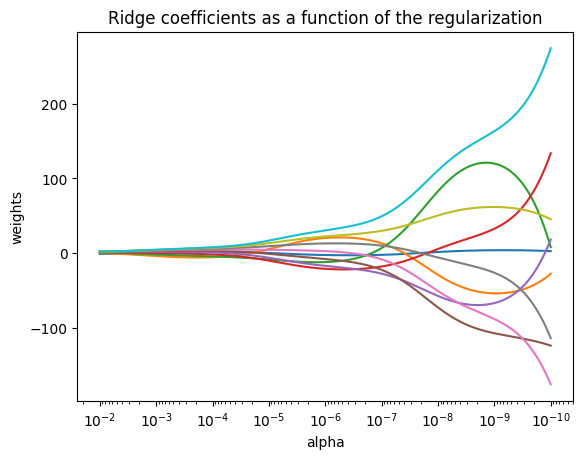

In [3]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Source: https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ridge_path.html

## Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

The below is the example code on how we can handle time-series data in Ridge Regression. I am getting the SSL error as I coded this in my office desktop but the code is correct and taken from the source below. Please consider the code as the answer.


Source: https://abouttrading.substack.com/p/lets-use-ridge-regression-to-predict

In [1]:
def data_preprocessing(data, num_lags, train_test_split):
    # Prepare the data for training
    x = []
    y = []
    for i in range(len(data) - num_lags):
        x.append(data[i:i + num_lags])
        y.append(data[i+ num_lags])
    # Convert the data to numpy arrays
    x = np.array(x)
    y = np.array(y)
    # Split the data into training and testing sets
    split_index = int(train_test_split * len(x))
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]

    return x_train, y_train, x_test, y_test

def plot_train_test_values(window, train_window, y_train, y_test, y_predicted):
    prediction_window = window
    first = train_window
    second = window - first
    y_predicted = np.reshape(y_predicted, (-1, 1))
    y_test = np.reshape(y_test, (-1, 1))
    plotting_time_series = np.zeros((prediction_window, 3))
    plotting_time_series[0:first, 0] = y_train[-first:]
    plotting_time_series[first:, 1] = y_test[0:second, 0]
    plotting_time_series[first:, 2] = y_predicted[0:second, 0] 
    plotting_time_series[0:first, 1] = plotting_time_series[0:first, 1] / 0
    plotting_time_series[0:first, 2] = plotting_time_series[0:first, 2] / 0
    plotting_time_series[first:, 0] = plotting_time_series[first:, 0] / 0
    plt.plot(plotting_time_series[:, 0], label = 'Training data', color = 'black', linewidth = 2.5)
    plt.plot(plotting_time_series[:, 1], label = 'Test data', color = 'black', linestyle = 'dashed', linewidth = 2)
    plt.plot(plotting_time_series[:, 2], label = 'Predicted data', color = 'red', linewidth = 1)
    plt.axvline(x = first, color = 'black', linestyle = '--', linewidth = 1)
    plt.grid()
    plt.legend()

def calculate_accuracy(predicted_returns, real_returns):
    predicted_returns = np.reshape(predicted_returns, (-1, 1))
    real_returns = np.reshape(real_returns, (-1, 1))
    hits = sum((np.sign(predicted_returns)) == np.sign(real_returns))
    total_samples = len(predicted_returns)
    accuracy = hits / total_samples
    
    return accuracy[0] * 100

def model_bias(predicted_returns):
    bullish_forecasts = np.sum(predicted_returns > 0)
    bearish_forecasts = np.sum(predicted_returns < 0)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
#from master_function import data_preprocessing
#from master_function import plot_train_test_values, calculate_accuracy, model_bias
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr

# Set the start and end dates for the data
start_date = '1990-01-01'
end_date   = '2024-01-01'

# Fetch S&P 500 price data
data = np.array((pdr.get_data_fred('SP500', start = start_date, end = end_date)).dropna())
data = np.reshape(data, (-1))
data = np.diff(data)

# Setting the hyperparameters
num_lags = 500
train_test_split = 0.95

# Creating the training and test sets
x_train, y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

# Fitting the model
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

# Predicting in-sample
y_predicted_train = np.reshape(model.predict(x_train), (-1, 1))

# Predicting out-of-sample
y_predicted = np.reshape(model.predict(x_test), (-1, 1))

# plotting
plot_train_test_values(100, 50, y_train, y_test, y_predicted)

# Performance evaluation
print('---')
print('Accuracy Train = ', round(calculate_accuracy(y_predicted_train, y_train), 2), '%')
print('Accuracy Test = ', round(calculate_accuracy(y_predicted, y_test), 2), '%')
print('RMSE Train = ', round(np.sqrt(mean_squared_error(y_predicted_train, y_train)), 10))
print('RMSE Test = ', round(np.sqrt(mean_squared_error(y_predicted, y_test)), 10))
print('Correlation In-Sample Predicted/Train = ', round(np.corrcoef(np.reshape(y_predicted_train, (-1)), y_train)[0][1], 3))
print('Correlation Out-of-Sample Predicted/Test = ', round(np.corrcoef(np.reshape(y_predicted, (-1)), np.reshape(y_test, (-1)))[0][1], 3))
print('Model Bias = ', round(model_bias(y_predicted), 2))
print('---')

SSLError: HTTPSConnectionPool(host='fred.stlouisfed.org', port=443): Max retries exceeded with url: /graph/fredgraph.csv?id=SP500 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1000)')))